# SciPy를 이용한 확률 분포 분석

SciPy는 각종 수치 해석 기능을 제공하는 파이썬 패키지다. SciPy는 여러개의 서브 패키지로 구성되어 있는데 그 중 scipy.stats 서브패키지는 여러가지 확률 분포 분석을 위한 기능을 제공한다. 

## 확률 분포 객체

SciPy에서 확률 분포 기능을 사용하려면 우선 해당 확률 분포에 대한 확률 분포 객체라는 것을 생성한 후에 이 객체의 메서드를 호출한다.

 확률 분포 객체를 생성하는 명령에는 다음과 같은 것들이 있다. 
 
| 종류 | 이름 | 확률 분포 |
|-|-|-|
| 이산 | `bernoulli` | 베르누이 분포 |
| 이산 | `binom` |  이항 분포 |
| 연속 | `uniform` | 균일 분포 |
| 연속 | `norm` | 가우시안 정규 분포 |
| 연속 | `beta` | 베타 분포 |
| 연속 | `gamma` | 감마 분포 |
| 연속 | `t` | 스튜던트 t 분포 |
| 연속 | `chi2` | 카이 제곱 분포 |
| 연속 | `f` | F 분포 |
| 연속 | `dirichlet` | 디리클리 분포 |
| 연속 | `multivariate_normal` | 다변수 가우시안 정규 분포 |


이 명령들은 모두 scipy.stats 서브패키지에 포함되어 있으므로 명령 앞에 서브패키지 이름과 마침표를 붙여야 한다. 예를 들어 가우시안 정규 분포 객체는 다음과 같이 생성한다.

In [2]:

from scipy.stats import norm

import numpy as np
import scipy as sp
from pandas.core import datetools as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [13]:
rv = sp.stats.norm() ## random valuable 

In [14]:
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

### 모수 지정

확률 분포 객체를 생성할 때는 분포의 모수(parameter)를 인수로 지정해 주어야 한다. 각 확률 분포마다 지정해 주어야 할 모수가 다르므로 자세한 설명은 문서를 참조하여야 하지만 대부분 다음과 같은 모수들을 공통적으로 가진다.

| 모수 또는 인수 | 의미 |
|-|-|
| `loc` | 일반적으로 분포의 기댓값, 평균 |
| `scale` |  일반적으로 분포의 표준편차 | 
| `size` | 샘플 생성시 생성될 샘플의 크기 | 
| `random_state` |  샘플 생성시 사용되는 시드(seed)값 |



예를 들어 기댓값이 1이고 표준 편차가 2인 정규 분포 객체는 다음과 같이 생성한다.

In [15]:
rv = sp.stats.norm(loc=1, scale=2)

## 확률 분포 메서드

확률 분포 객체가 가지는 메서드는 다음과 같다.


| 메서드 | 기능 |
|-|-|
| `pdf` | 확률 밀도 함수  (probability density function) |
| `pmf` | 확률 질량 함수  (probability mass function) |
| `cdf` | 누적 분포 함수 (cumulative distribution function)  |
| `rvs` | 랜덤 샘플 생성 (random variable sampling)    |
| `stats` | 기술 통계 함수 (descriptive statistics)   |
| `fit` | 모수 추정 (parameter estimation)    |


메서드 사용법은 다음과 같다.

### 확률 밀도 함수

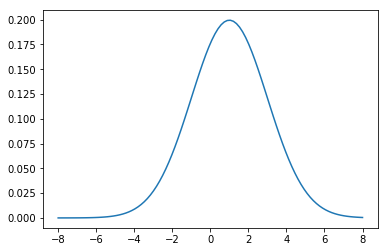

In [18]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.show()

### 누적 분포 함수

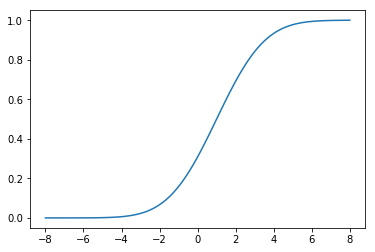

In [19]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.show()

### 랜덤 샘플 생성

In [20]:
rv.rvs(size=(3,5), random_state=0) ## 3번씩 5세트 3*5행렬 , 씨드값은 0으로 셋팅한다 

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

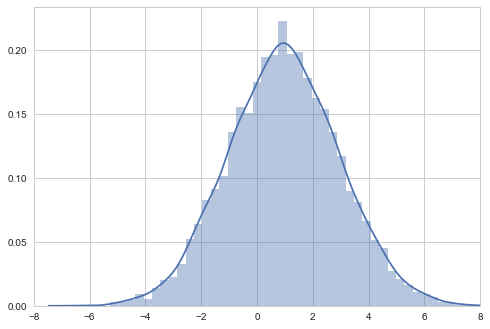

In [23]:

sns.distplot(rv.rvs(size=10000, random_state=0))
plt.xlim(-8, 8)
plt.show() ## kde kernel display expectation ## 대충 이러한 선그래프가 나온다는 것을 보여줌 

NumPy를 사용하여 20개의 숫자를 무작위로 생성한 후 히스토그램을 그리고 샘플 평균을 구한다.
1번과 같이 20개의 숫자 생성 및 샘플 평균 계산을 10번 반복하여 10개의 샘플 평균을 구한다.
2번에서 구한 샘플 평균의 히스토그램을 그리고 샘플 평균을 구한다.

In [3]:
a= np.random.randint(100,size=20)
a

array([12, 99, 38, 38, 26, 14, 90, 78, 53, 98, 14,  5, 75, 52, 32, 54, 55,
       23, 38, 80])

In [4]:
np.mean(a)

48.700000000000003

In [5]:
np.std(a)

28.944947745677485

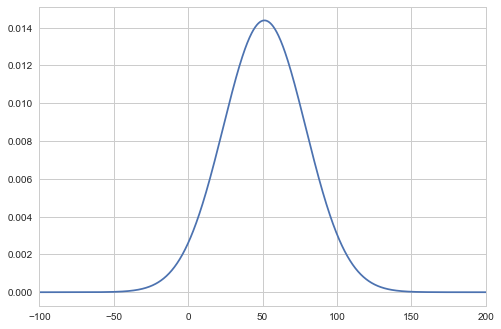

In [51]:
a= np.random.randint(100,size=20)

rv = sp.stats.norm(loc = np.mean(a), scale = np.std(a))
xx = np.linspace(-100, 200, 1000)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.show()


In [59]:
rv.rvs(size=(20,100), random_state=0) 

array([[ 100.12057803,   62.29713211,   78.3422943 , ...,  100.72563741,
          54.7195174 ,   62.34794131],
       [ 103.4234053 ,   13.82403864,   15.96699762, ...,   74.03736042,
         111.1907102 ,   88.26450095],
       [  40.96187472,   44.56155315,   81.6956841 , ...,   67.36643125,
          40.12250706,   61.46236437],
       ..., 
       [   7.99369223,   37.13894672,   74.6333598 , ...,   56.28742978,
          38.1454015 ,   58.76517067],
       [  73.88409861,   43.46516855,   90.90013835, ...,    5.49649623,
          59.48390662,   76.453963  ],
       [  50.37203209,   47.92289596,   47.24299421, ...,   55.59367652,
          19.53286857,   14.84426007]])

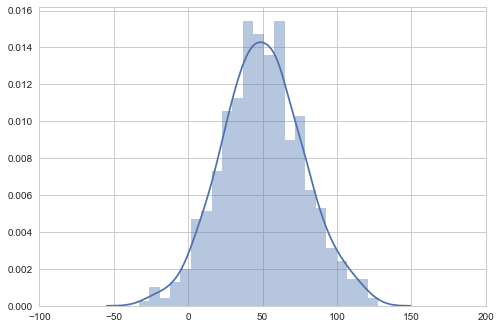

In [61]:
a= np.random.randint(100,size=20)
rv = sp.stats.norm(loc = np.mean(a), scale = np.std(a))
rv.rvs(size=(20,100), random_state=0) ## 20행, 100열 
sns.distplot(rv.rvs(size=1000, random_state=0)) ## 히스토그램의 x 변수 개수는 1000개, 씨드는 0 
plt.xlim(-100, 200)
plt.show()

In [87]:
rv = sp.stats.norm(loc = 0, scale =1) ## 하기와 같은값, 랜덤, 표준편차 1 표준0인 그래프 만듬 
x= rv.rvs(size=(20,100), random_state=0)
print(x)


[[ 1.76405235  0.40015721  0.97873798 ...,  1.78587049  0.12691209
   0.40198936]
 [ 1.8831507  -1.34775906 -1.270485   ...,  0.82350415  2.16323595
   1.33652795]
 [-0.36918184 -0.23937918  1.0996596  ...,  0.58295368 -0.39944903
   0.37005589]
 ..., 
 [-1.55799853 -0.50703477  0.8449956  ...,  0.18345025 -0.4707425
   0.27279639]
 [ 0.81797761 -0.27891428  1.43156776 ..., -1.64804621  0.29871366
   0.91064567]
 [-0.02985612 -0.11817078 -0.14268771 ...,  0.15843385 -1.14190142
  -1.31097037]]
[ 0.05980802  0.08201297 -0.05923226 -0.19679671 -0.01256422 -0.20293098
 -0.13494963 -0.12359928 -0.02819913  0.16388415 -0.00286906  0.19502454
 -0.00222687  0.00319419 -0.04713775  0.05801078  0.06511321 -0.0661877
 -0.09869436  0.03194243]


In [88]:
print(mean)

[ 0.05980802  0.08201297 -0.05923226 -0.19679671 -0.01256422 -0.20293098
 -0.13494963 -0.12359928 -0.02819913  0.16388415 -0.00286906  0.19502454
 -0.00222687  0.00319419 -0.04713775  0.05801078  0.06511321 -0.0661877
 -0.09869436  0.03194243]


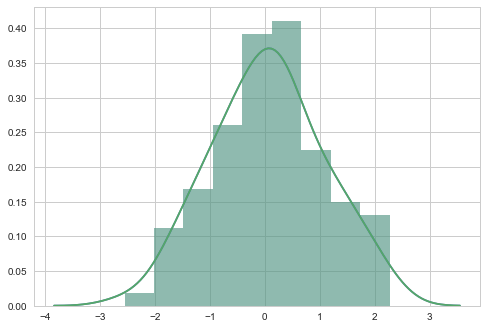

In [79]:
rv = sp.stats.norm(loc = 0, scale =1)
x= rv.rvs(size=(20,100), random_state=0) 
mean = x.mean(axis=1) ## 2차원일때 세로축은 0 , 가로축은 1 => 20개의 행렬에서 첫번째 행의 평균, 두번째 행의 평균.... 축을 가로로 잡아라(대신2차원에서만 가능)
sns.distplot(x[0]) ## 0행 그래프 (샘플 20개행중에서 1개만 뽑아서 그래프 그려라 )
plt.show()

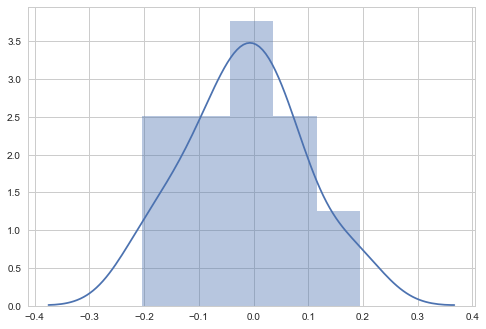

In [77]:
sns.distplot(mean) ## 샘플 20개 행의 평균들의 그래프 

plt.show()